# Objective:
### To design a recommendation system that can suggest personalized news articles or blog posts to users based on their reading history and interests.The system should be able to learn and adapt to the user's preferences overtime and provide relevant and engaging content.  

# About Dataset:
### The datasets consists of  variables like category, headline, authors, link, short_description, date.

# Variables Description:
* category: The category of the news.
* headline: The title of news.
* authors: Author of that particular news.
* link: The web address of that particular news.
* short_desceiption: In short about the news published.
* date: Day on which the news was published.


# Tasks carried out:
* Data Extraction
* Data Exploration and EDA.
* Text Processing.
* Model Building
* Creating a pickle file for model deployment using web application :.

## 1) Importing The Required Libraries:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
#import nltk
import string
#nltk.download('stopwords')
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
#from gensim.models import Word2Vec
#from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances
#from sklearn.metrics.pairwise import cosine_similarity
#from scipy.sparse import csr_matrix
import pickle
import warnings
warnings.filterwarnings("ignore")

## 2) Loading The Dataset:

In [6]:
news_articles = pd.read_csv(r"C:\Users\sksho\Desktop\ZenteiQ\Work\Data\News category dataset.csv")
news_articles.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [7]:
news_articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           200853 non-null  object
 1   headline           200847 non-null  object
 2   authors            164233 non-null  object
 3   link               200853 non-null  object
 4   short_description  181141 non-null  object
 5   date               200853 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB


#### Note: From above we can observe that there are some missing values. Hence we will check the Number of missing values in the data and the contribution of missing values in the data.

In [8]:
missing_values_contribution = pd.DataFrame({'No.of Missing Values': news_articles.isna().sum(),
                                            '% of Missing Values': (news_articles.isna().sum() / len(news_articles)) * 100})

In [9]:
missing_values_contribution

,No.of Missing Values,% of Missing Values
category,0,0.000000
headline,6,0.002987
authors,36620,18.232239
link,0,0.000000
short_description,19712,9.814143
date,0,0.000000


#### Note: There are total 200853 records in the data with 6 object type features. Also there are missing values in the data.
* We can observe that the feature authors have maximum number of missing values followed by shrot_description and headlines which contributes about 18.23%, 9.81%, and 0.0029% of data respectively.
* We will drop this null values as this will not contribute much in our analysis of dataset. 


In [10]:
news_articles.dropna(inplace=True)

In [11]:
news_articles.isna().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

In [12]:
news_articles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148983 entries, 0 to 200848
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   category           148983 non-null  object
 1   headline           148983 non-null  object
 2   authors            148983 non-null  object
 3   link               148983 non-null  object
 4   short_description  148983 non-null  object
 5   date               148983 non-null  object
dtypes: object(6)
memory usage: 8.0+ MB


#### Note: we can observe that all null values have be dropped and we are left with 148983 non null values.

In [13]:
news_articles.shape

(148983, 6)

#### Note: From the dataset we can note that the columns category, authors, and short description can have same values. hence we have to note that if there are any duplicate values in the headlines column. and eliminate them. 

In [14]:
news_articles['headline'].count()

148983

In [15]:
news_articles

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200843,TECH,Good Games -- Is It possible?,"Mateo Gutierrez, Contributor\nArtist",https://www.huffingtonpost.com/entry/games-for...,I don't think people who play Zynga games are ...,2012-01-28
200844,TECH,Google+ Now Open for Teens With Some Safeguards,"Larry Magid, Contributor\nTechnology journalist",https://www.huffingtonpost.com/entry/google-pl...,"For the most part, teens' experience on Google...",2012-01-28
200845,TECH,Web Wars,"John Giacobbi, Contributor\nTales from the Int...",https://www.huffingtonpost.com/entry/congress-...,"These ""Web Wars"" threaten to rage on for some ...",2012-01-28
200847,TECH,Watch The Top 9 YouTube Videos Of The Week,Catharine Smith,https://www.huffingtonpost.com/entry/watch-top...,If you're looking to see the most popular YouT...,2012-01-28


In [16]:
news_articles.sort_values('headline',inplace=True, ascending=False)
duplicated_articles_series = news_articles.duplicated('headline', keep = False)
news_articles = news_articles[~duplicated_articles_series]
print("Total number of articles after removing duplicates:", news_articles['headline'].nunique())

Total number of articles after removing duplicates: 147706


#### To see the total number of unique records.

In [17]:
news_articles.nunique()

category                 41
headline             147706
authors               27055
link                 147706
short_description    146102
date                   2309
dtype: int64

 ## 3) Exploratory Data Analysis:

In [18]:
news_articles["category"].value_counts().head()

POLITICS          26779
WELLNESS          12745
ENTERTAINMENT     12171
TRAVEL             7992
STYLE & BEAUTY     6635
Name: category, dtype: int64

In [19]:
news_articles["category"].value_counts().tail()

LATINO VOICES     877
ARTS              861
COLLEGE           859
ENVIRONMENT       669
CULTURE & ARTS    611
Name: category, dtype: int64

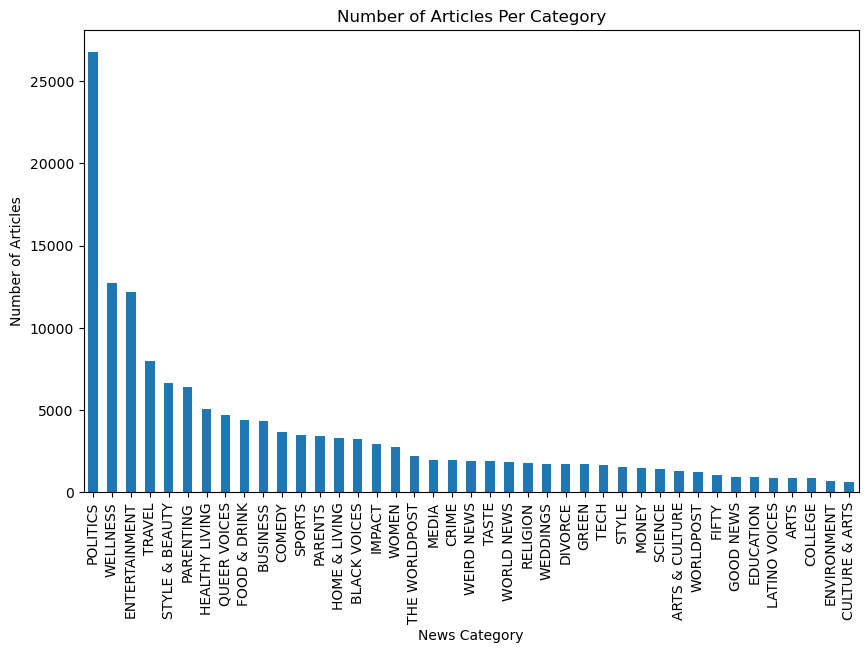

In [20]:
plt.figure(figsize=(10,6))
news_articles["category"].value_counts().plot.bar(xlabel = 'News Category', 
                                   ylabel = 'Number of Articles', 
                                   title = 'Number of Articles Per Category')
plt.show()

#### Note: 
* We can observe that Top 5 articles that are watched are based on Politics, Wellness, Entertainment, Travel, Style & Beauty.
* We can observe that Bottom 5 articles that are watched are based on Culture & Arts, Environment, College, Arts,Latino Voices.

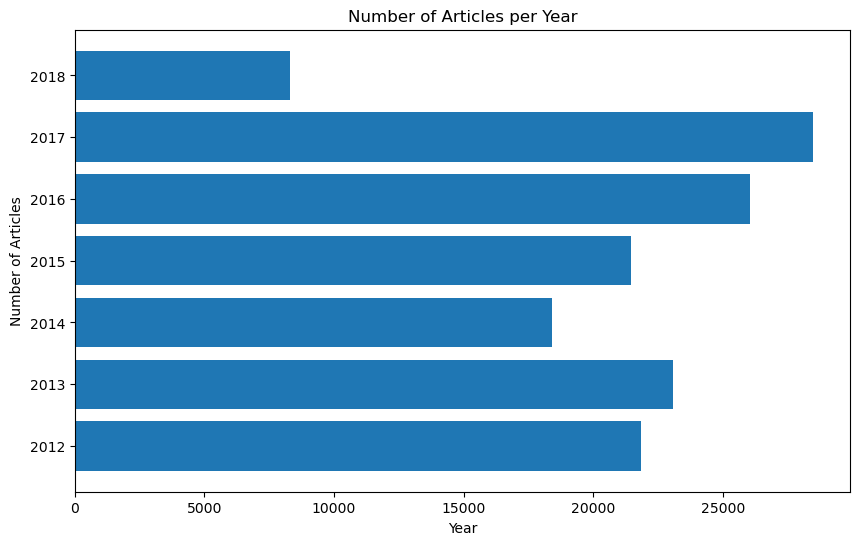

In [21]:
news_articles['date'] = pd.to_datetime(news_articles['date'])

# Resample the DataFrame by Year and count the number of articles
news_articles_monthly = news_articles.resample('Y', on='date')['headline'].count()

# Create a bar plot of the monthly article counts
plt.figure(figsize = (10,6))
plt.barh(news_articles_monthly.index.strftime('%Y'), news_articles_monthly)

# Set the plot title and axis labels
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')

# Display the plot
plt.show()

#### Note: From above ditribution we can observe the total number of articles on yearly basis.

In [22]:
news_articles.index = range(news_articles.shape[0])

In [23]:
news_articles["day and month"] = news_articles["date"].dt.strftime("%a") + "_" + news_articles["date"].dt.strftime("%b")

In [24]:
news_articles["user_id"] = ["user_" + str(i) for i in range(1, 147707)]

In [25]:
news_articles = news_articles.reindex(columns=['user_id', 'category', 'headline','authors','link','short_description','date','day and month'])

In [26]:
news_articles

,user_id,category,headline,authors,link,short_description,date,day and month
0,user_1,WOMEN,"“We Shall Overcomb!” Say The 100,000 Marching ...","Darin Graham, ContributorJournalist",https://www.huffingtonpost.com/entry/we-shall-...,Thousands of activists descended on London to ...,2017-01-25,Wed_Jan
1,user_2,HEALTHY LIVING,“To The Bone” Didn’t Teach Me Glamour. It Taug...,"Mycah Hazel, Contributorblogger, equal opportu...",https://www.huffingtonpost.com/entry/to-the-bo...,"Oftentimes, films or TV shows about eating dis...",2017-07-18,Tue_Jul
2,user_3,BUSINESS,"“I’m Sorry""--The Two Tragically Forgotten Word...","Dana Brownlee, ContributorPresident of Profess...",https://www.huffingtonpost.com/entry/im-sorryt...,"Unfortunately, I was one of those frustrated p...",2017-04-10,Mon_Apr
3,user_4,QUEER VOICES,‘Will & Grace’ Creator To Donate Gay Bunny Boo...,Elyse Wanshel,https://www.huffingtonpost.com/entry/will-grac...,It's about to be a lot easier for kids in Mike...,2018-04-02,Mon_Apr
4,user_5,WEIRD NEWS,‘Wild Boar Curling’ Rescues Stranded Wild Boar...,Nina Golgowski,https://www.huffingtonpost.com/entry/wild-boar...,Get this pig in a blanket!,2016-02-03,Wed_Feb
...,...,...,...,...,...,...,...,...
147701,user_147702,PARENTING,"""A Doctor Prescribed My Son 140 Pain Pills in ...","Tessie Castillo, Contributor\nAdvocacy and Com...",https://www.huffingtonpost.com/entry/a-doctor-...,"""I thought Riley was exempt from hard drugs,"" ...",2013-08-29,Thu_Aug
147702,user_147703,ARTS,"""@Large"" and Absent, Ai Weiwei on Alcatraz","MutualArt, ContributorWorld's largest online a...",https://www.huffingtonpost.com/entry/large-and...,"The United States' most storied island prison,...",2014-10-06,Mon_Oct
147703,user_147704,MONEY,"""4% Rule"" Serves as Guideline for Today's Reti...","Cheryl Krueger, Contributor\nFounder, Growing ...",https://www.huffingtonpost.com/entry/retiremen...,"An estimated 10,000 baby boomers turn age 65 e...",2012-04-04,Wed_Apr
147704,user_147705,ENTERTAINMENT,"""3 Days to Kill"" Proves Costner's Still Got It","Jackie K Cooper, Contributor\nFilm Critic",https://www.huffingtonpost.com/entry/3-days-to...,Kevin Costner is starring in the new action fl...,2014-02-22,Sat_Feb


In [27]:
news_articles_temp = news_articles.copy()

In [28]:
news_articles_temp.head(1)

,user_id,category,headline,authors,link,short_description,date,day and month
0,user_1,WOMEN,"“We Shall Overcomb!” Say The 100,000 Marching ...","Darin Graham, ContributorJournalist",https://www.huffingtonpost.com/entry/we-shall-...,Thousands of activists descended on London to ...,2017-01-25,Wed_Jan


In [29]:
news_articles_temp.tail(1)

,user_id,category,headline,authors,link,short_description,date,day and month
147705,user_147706,ENTERTAINMENT,"""2 Guns"": Two Pros In Action","Jackie K Cooper, Contributor\nFilm Critic",https://www.huffingtonpost.com/entry/2-guns-tw...,It helps that the supporting cast is almost as...,2013-08-03,Sat_Aug


#### Note: We can observe that all the changes has been done.

## 4) Text Processing:

In [30]:
stop_words = set(stopwords.words('english'))

In [31]:
for i, headline in enumerate(news_articles_temp["headline"]):
    cleaned_words = [word.lower() for word in headline.split() if word.isalnum() and word.lower() not in stop_words]
    cleaned_headline = ' '.join(cleaned_words)
    news_articles_temp.at[i, "clean_headline"] = cleaned_headline
    if(i%1000==0):
        print(i)           # To track number of records processed

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000


In [32]:
lemmatizer = WordNetLemmatizer()

In [33]:
for i, headline in enumerate(news_articles_temp["headline"]):
    if isinstance(headline, str):
        lemmatized_words = [lemmatizer.lemmatize(word, pos="v") for word in word_tokenize(headline)]
        lemmatized_headline = ' '.join(lemmatized_words)
        news_articles_temp.at[i, "lemmatized_headline"] = lemmatized_headline
    if i % 1000 ==0:
        print(i)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000


## 5) Model Building:

### 5.1 Using Bag of Words:

In [34]:
headline_vectorizer = CountVectorizer()
headline_features   = headline_vectorizer.fit_transform(news_articles_temp['headline'])

In [35]:
headline_features.get_shape()

(147706, 48689)

In [44]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_sim = None  # Declare as global variable

def bag_of_words_based_model(user_id, num_similar_items):
    global euclidean_sim  # Declare as global to modify the variable

    # Calculate the Euclidean similarity
    euclidean_sim = euclidean_distances(headline_features,headline_features[user_id].reshape(1, -1))
    indices = np.argsort(euclidean_sim.ravel())[0:num_similar_items]

    df = pd.DataFrame({
        'publish_date': news_articles['date'][indices].values,
        'category': news_articles['category'][indices].values,
        'headline': news_articles['headline'][indices].values,
        'link': news_articles['link'][indices].values,
        'short_description': news_articles['short_description'][indices].values,
        'Euclidean similarity with the queried article': euclidean_sim[indices].ravel()
    })

    print("*" * 30, "Queried article details", "*" * 30)
    print('headline: ', news_articles['headline'][indices[0]])
    print("\n", "*" * 30, "Recommended articles: ", "*" * 30)

    return df.iloc[1:,]


#### Note: we have created a function with 2 input parameters i.e., user_id and number of recommendations needed for that particular user_id. Now we will enter the parameters and see the recommendations using Bag of words.

In [45]:
bag_of_words_based_model(1, 5)

****************************** Queried article details ******************************
headline:  “To The Bone” Didn’t Teach Me Glamour. It Taught Me Respect.

 ****************************** Recommended articles:  ******************************


,publish_date,category,headline,link,short_description,Euclidean similarity with the queried article
1,2015-05-18,HEALTHY LIVING,It Didn't Happen to Me,https://www.huffingtonpost.com/entry/it-didnt-...,"If it happened to a friend, a third cousin twi...",2.828427
2,2013-11-18,WELLNESS,The Real Me,https://www.huffingtonpost.com/entry/the-real-...,Several weeks ago I had that moment. With very...,3.162278
3,2015-04-06,SCIENCE,Fly Me to the Moon!,https://www.huffingtonpost.com/entry/fly-me-to...,"Yes, I know the current push by our Federal Sp...",3.162278
4,2013-10-16,PARENTING,Listen to Me,https://www.huffingtonpost.com/entry/listen-to...,Kids don't listen. Not every time. Not now and...,3.162278


#### Note: Hence we can see that the following recommendations have been provided for the user_id we have chosen.

### 5.2 Using Tf-idf:

In [46]:
tfidf_headline_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_headline_features = tfidf_headline_vectorizer.fit_transform(news_articles_temp['headline'])

In [47]:
euclidean_sim = None  # Declare as global variable

def tfidf_based_model(user_id, num_similar_items):
    global euclidean_sim  # Declare as global to modify the variable

    # Calculate the Euclidean similarity
    euclidean_sim = euclidean_distances(headline_features, headline_features[user_id].reshape(1, -1))
    indices = np.argsort(euclidean_sim.ravel())[0:num_similar_items]

    df = pd.DataFrame({
        'publish_date': news_articles['date'][indices].values,
        'category': news_articles['category'][indices].values,
        'headline': news_articles['headline'][indices].values,
        'link': news_articles['link'][indices].values,
        'short_description': news_articles['short_description'][indices].values,
        'Euclidean similarity with the queried article': euclidean_sim[indices].ravel()
    })

    print("*" * 30, "Queried article details", "*" * 30)
    print('headline: ', news_articles['headline'][indices[0]])
    print("\n", "*" * 30, "Recommended articles: ", "*" * 30)

    return df.iloc[1:,]

#### Note: we have created a function with 2 input parameters i.e., user_id and number of recommendations needed for that particular user_id. Now we will enter the parameters and see the recommendations using Tf-idf.

In [48]:
tfidf_based_model(1, 5)

****************************** Queried article details ******************************
headline:  “To The Bone” Didn’t Teach Me Glamour. It Taught Me Respect.

 ****************************** Recommended articles:  ******************************


,publish_date,category,headline,link,short_description,Euclidean similarity with the queried article
1,2015-05-18,HEALTHY LIVING,It Didn't Happen to Me,https://www.huffingtonpost.com/entry/it-didnt-...,"If it happened to a friend, a third cousin twi...",2.828427
2,2013-11-18,WELLNESS,The Real Me,https://www.huffingtonpost.com/entry/the-real-...,Several weeks ago I had that moment. With very...,3.162278
3,2015-04-06,SCIENCE,Fly Me to the Moon!,https://www.huffingtonpost.com/entry/fly-me-to...,"Yes, I know the current push by our Federal Sp...",3.162278
4,2013-10-16,PARENTING,Listen to Me,https://www.huffingtonpost.com/entry/listen-to...,Kids don't listen. Not every time. Not now and...,3.162278


#### Note: Hence we can see that the following recommendations have been provided for the user_id we have chosen.

In [49]:
euclidean_sim

array([[4.79583152],
       [0.        ],
       [4.47213595],
       ...,
       [4.89897949],
       [4.12310563],
       [4.24264069]])

## 6) Creating a pickle file for model deployment using web application :

#### Note: There are lots of features i am filtering the requrired features i.e., user_id, category, headline, link, short_description as this will be used to get the information related to news recommendation. 

In [50]:
# Making a dictionary so that this can be consumed in the web application 
data_for_web_app = news_articles_temp[['user_id','category','headline','link','short_description']]

In [ ]:
# Exporting the filtered data for Web App to csv file so that it can be consumed during development.
data_for_web_app.to_csv('user_data.csv')

In [ ]:
# Save the final Model as a pickle file for deployment.
pickle.dump(tfidf_headline_vectorizer,open('tf-idf Final Model File.pkl','wb'))